<a href="https://colab.research.google.com/github/earo12/Stock-Market-Analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import DataReader
from pandas_datareader import data as pdr
from datetime import datetime

In [2]:
tec_lis = ['AAPL', 'GOOG', 'MSFT' , 'AMZN']
tec_lis = ['AAPL', 'GOOG', 'MSFT' , 'AMZN']
end = datetime.now()
start = datetime(end.year - 1 , end.month , end.day)

In [3]:
for variable in tec_lis:
  globals()[variable] = yf.download(variable, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
com_lis = [AAPL, GOOG, MSFT, AMZN]
com_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']
for company, com_name in zip(com_lis, com_name):
  company['com_name'] = com_name
df = pd.concat(com_lis, axis = 0)
df.tail(10)


,Open,High,Low,Close,Adj Close,Volume,com_name
Date,,,,,,,
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300,AMAZON
2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400,AMAZON
2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300,AMAZON
2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700,AMAZON
2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500,AMAZON
2023-04-05,103.910004,103.910004,100.750000,101.099998,101.099998,45175400,AMAZON
2023-04-06,100.750000,102.379997,99.800003,102.059998,102.059998,43808000,AMAZON
2023-04-10,100.959999,102.199997,99.570000,102.169998,102.169998,37261200,AMAZON
2023-04-11,100.800003,101.000000,99.010002,99.919998,99.919998,60349000,AMAZON


In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,149.322829,151.376653,147.450658,149.491994,149.079403,8.045936e+07
std,10.756411,10.642172,10.818460,10.746120,10.688300,2.457772e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,2.411342e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973427,6.495500e+07
50%,148.869995,150.919998,147.240005,149.350006,148.910004,7.532940e+07
75%,156.275002,158.154999,154.164993,156.779999,155.852943,8.904005e+07
max,173.750000,176.149994,173.119995,174.550003,173.995270,1.826020e+08


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-04-12 to 2023-04-12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
 6   com_name   251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


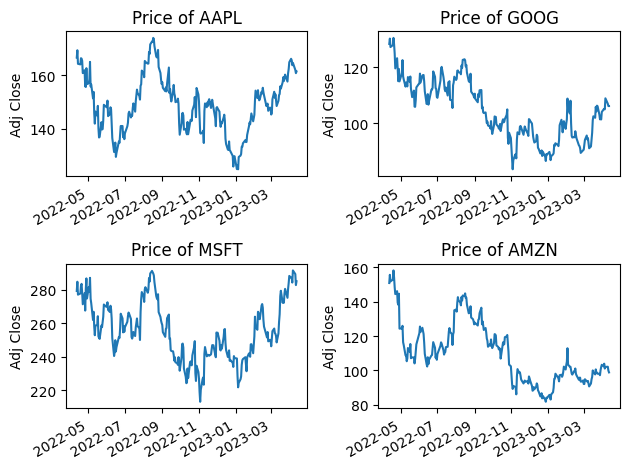

In [7]:
for j, comp in enumerate(com_lis, 1):
  plt.subplot(2,2,j)
  comp['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f'Price of {tec_lis[j-1]}')
plt.tight_layout()
plt.show()


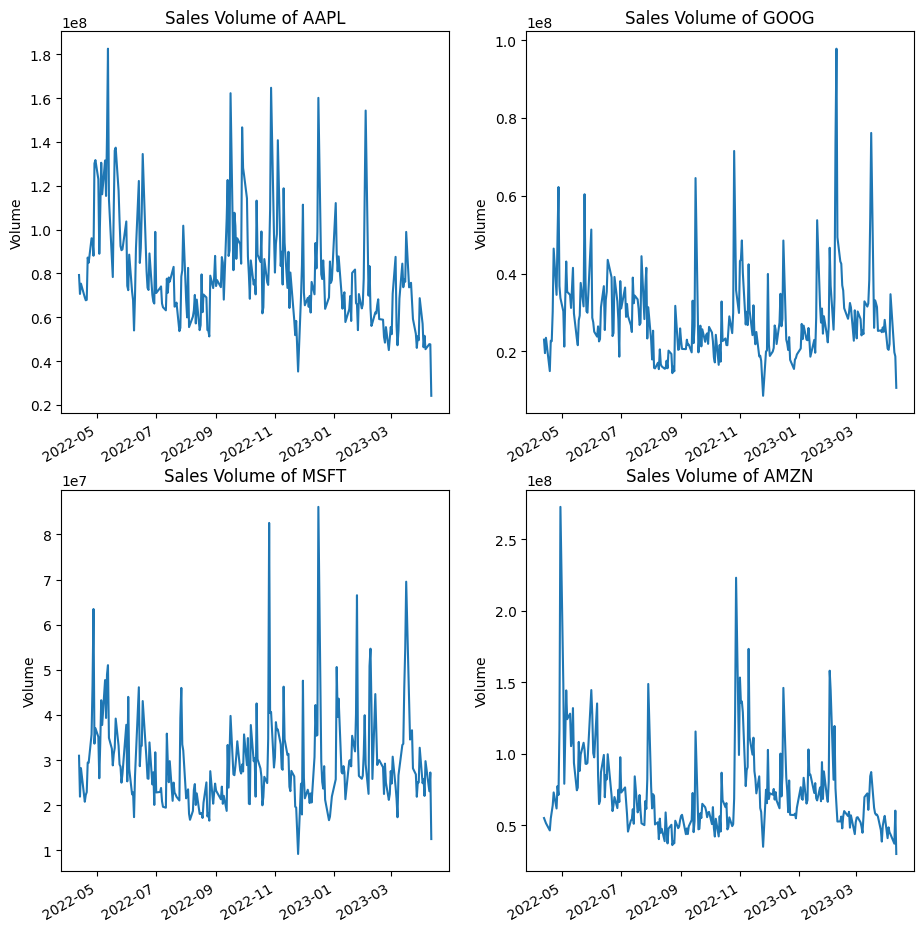

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize = (11,8))
plt.subplots_adjust(top = 1.25, bottom = 1.2)
for j, comp in enumerate(com_lis, 1):
  plt.subplot(2,2,j)
  comp['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f'Sales Volume of {tec_lis[j-1]}')
plt.show()
plt.tight_layout()

In [9]:
days = [10, 20, 30]
for variable in days:
  for c in com_lis:
    col_name = f'MA for {variable} days'
    c[col_name] = c['Adj Close'].rolling(variable).mean()